In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns; sns.set()
%matplotlib inline

# Data Preprocessing

In [78]:
data = pd.read_csv('./Traffic_accidents.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   OBJECTID              4265 non-null   int64 
 1   DATE_                 4265 non-null   object
 2   TIME                  4265 non-null   int64 
 3   SEVERITY              4265 non-null   int64 
 4   SEVERITY_DESCRIPTION  4265 non-null   object
 5   ACCIDENT_TYPE         4265 non-null   object
 6   ACCIDENT_DESCRIPTION  4265 non-null   object
 7   VEHICLES              4265 non-null   int64 
 8   CASUALTIES            4265 non-null   int64 
 9   PEDESTRIAN            4265 non-null   int64 
 10  CYCLES                4265 non-null   int64 
 11  MCYCLES               4265 non-null   int64 
 12  CHILDREN              4265 non-null   int64 
 13  OAPS                  4265 non-null   int64 
 14  X                     4265 non-null   int64 
 15  Y                     4265 non-null   

In [79]:
data.head(3)

,OBJECTID,DATE_,TIME,SEVERITY,SEVERITY_DESCRIPTION,ACCIDENT_TYPE,ACCIDENT_DESCRIPTION,VEHICLES,CASUALTIES,PEDESTRIAN,CYCLES,MCYCLES,CHILDREN,OAPS,X,Y,RENDER
0,1,2017/02/02 00:00:00+00,720,3,Slight,LC,Loss of Control,2,2,0,1,1,0,0,360035,175918,CYC
1,2,2017/02/02 00:00:00+00,1803,3,Slight,J,Turning movement ¿ unidentified priority,2,1,0,1,0,0,0,359039,172053,CYC
2,3,2017/02/03 00:00:00+00,2021,3,Slight,J2,Turning Movement from minor road,2,1,0,1,0,0,0,362596,175377,CYC


In [80]:
data.isnull().sum()

OBJECTID                0
DATE_                   0
TIME                    0
SEVERITY                0
SEVERITY_DESCRIPTION    0
ACCIDENT_TYPE           0
ACCIDENT_DESCRIPTION    0
VEHICLES                0
CASUALTIES              0
PEDESTRIAN              0
CYCLES                  0
MCYCLES                 0
CHILDREN                0
OAPS                    0
X                       0
Y                       0
RENDER                  0
dtype: int64

<Axes: >

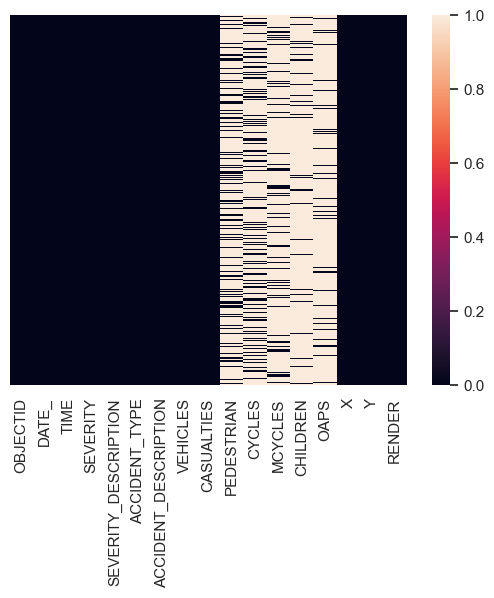

In [81]:
sns.heatmap(data == 0, yticklabels=False)

In [82]:
pd.get_dummies(data["SEVERITY"])

,1,2,3
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
4260,False,False,True
4261,False,True,False
4262,False,False,True
4263,False,False,True


In [83]:
new_severity = pd.get_dummies(data["SEVERITY"])

In [84]:
data=pd.concat([data,new_severity],axis=1)
data.head(3)

,OBJECTID,DATE_,TIME,SEVERITY,SEVERITY_DESCRIPTION,ACCIDENT_TYPE,ACCIDENT_DESCRIPTION,VEHICLES,CASUALTIES,PEDESTRIAN,CYCLES,MCYCLES,CHILDREN,OAPS,X,Y,RENDER,1,2,3
0,1,2017/02/02 00:00:00+00,720,3,Slight,LC,Loss of Control,2,2,0,1,1,0,0,360035,175918,CYC,False,False,True
1,2,2017/02/02 00:00:00+00,1803,3,Slight,J,Turning movement ¿ unidentified priority,2,1,0,1,0,0,0,359039,172053,CYC,False,False,True
2,3,2017/02/03 00:00:00+00,2021,3,Slight,J2,Turning Movement from minor road,2,1,0,1,0,0,0,362596,175377,CYC,False,False,True


In [85]:
data.drop(['OBJECTID','DATE_','TIME','SEVERITY','SEVERITY_DESCRIPTION', 'CASUALTIES', 'ACCIDENT_TYPE','ACCIDENT_DESCRIPTION', 'X', 'Y', 'RENDER'],axis=1,inplace=True)
data.head(3)

,VEHICLES,PEDESTRIAN,CYCLES,MCYCLES,CHILDREN,OAPS,1,2,3
0,2,0,1,1,0,0,False,False,True
1,2,0,1,0,0,0,False,False,True
2,2,0,1,0,0,0,False,False,True


In [86]:
data.rename(columns={1: 'Fatal',2: 'Severe', 3: 'Slight'}, inplace=True)

In [87]:
data.head(3)

,VEHICLES,PEDESTRIAN,CYCLES,MCYCLES,CHILDREN,OAPS,Fatal,Severe,Slight
0,2,0,1,1,0,0,False,False,True
1,2,0,1,0,0,0,False,False,True
2,2,0,1,0,0,0,False,False,True


# Performance Evaluation Functions

In [88]:
def plot_dataset(X, y, axes):
    plt.plot(X[:,0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:,0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$Age$", fontsize=15)
    plt.ylabel(r"$Glucose$", fontsize=15, rotation=90)

In [89]:
results = []
def add_results(result):
    results.append(result)
    
def get_results():
    print("Model, Test Avg. Accuracy, Test Avg. Precision")
    return results

In [90]:
def evaluate_model(sort, model):
    model = model
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)

    pipe.score(X_test, y_test)

    y_pred=pipe.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_pred))

    acc_train_scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = 10)
    prec_train_scores = cross_val_score(pipe, X_train, y_train, scoring = 'precision', cv = 10)

    print("\nTraining Results:")
    print("Fold | Accuracy | Precision")
    for i in range(len(acc_train_scores)):
        print("%d    | %.2f     | %.2f" % (i, acc_train_scores[i], prec_train_scores[i]))

    print('\nAvg  | %.2f     | %.2f\n' % (np.mean(acc_train_scores), np.mean(prec_train_scores)))
    
    acc_test_scores = cross_val_score(pipe, X_test, y_test, scoring = 'accuracy', cv = 10)
    prec_test_scores = cross_val_score(pipe, X_test, y_test, scoring = 'precision', cv = 10)
    
    print("Test Results:")
    print("Fold | Accuracy | Precision")
    for i in range(len(acc_test_scores)):
        print("%d    | %.2f     | %.2f" % (i, acc_test_scores[i], prec_test_scores[i]))

    print('\nAvg  | %.2f     | %.2f\n' % (np.mean(acc_test_scores), np.mean(prec_test_scores)))

    avgAcc = round(np.mean(acc_test_scores), 2)
    avgPrec = round(np.mean(prec_test_scores), 2)
    add_results((sort, avgAcc, avgPrec))